# Project Details

Project Name:Application of ML in Electrical Engineering

Simulation name: Daily Energy Demand

Created By- Samridh(12014071)

# Importing Important Libraries

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew ,kurtosis, shapiro
%matplotlib inline

# Import Data

Data is spanish electricity market demand in MWh.
Data is download from Kaggle

In [3]:
path = "spain_energy_market.csv"
data=pd.read_csv(path,sep=",",parse_dates=["datetime"])
data=data[data["name"]=="Demanda programada PBF total"]
data

,datetime,id,name,geoid,geoname,value
21994,2014-01-01 23:00:00,10141,Demanda programada PBF total,NaN,NaN,620107.7
21995,2014-01-02 23:00:00,10141,Demanda programada PBF total,NaN,NaN,659865.2
21996,2014-01-03 23:00:00,10141,Demanda programada PBF total,NaN,NaN,632536.8
21997,2014-01-04 23:00:00,10141,Demanda programada PBF total,NaN,NaN,610251.7
21998,2014-01-05 23:00:00,10141,Demanda programada PBF total,NaN,NaN,572534.1
...,...,...,...,...,...,...
23814,2018-12-26 23:00:00,10141,Demanda programada PBF total,NaN,NaN,649103.9
23815,2018-12-27 23:00:00,10141,Demanda programada PBF total,NaN,NaN,639571.2
23816,2018-12-28 23:00:00,10141,Demanda programada PBF total,NaN,NaN,602541.7
23817,2018-12-29 23:00:00,10141,Demanda programada PBF total,NaN,NaN,574254.2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1825 entries, 21994 to 23818
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  1825 non-null   datetime64[ns]
 1   id        1825 non-null   int64         
 2   name      1825 non-null   object        
 3   geoid     0 non-null      float64       
 4   geoname   0 non-null      object        
 5   value     1825 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 99.8+ KB


In [4]:
data["date"]=data["datetime"].dt.date
data.set_index("date",inplace=True)
data=data[["value"]]

In [5]:
data=data.asfreq("D")

In [6]:
data=data.rename(columns={"value":"energy"})
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2014-01-01 to 2018-12-30
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   energy  1825 non-null   float64
dtypes: float64(1)
memory usage: 28.5 KB


In [42]:
data

,energy
date,
2014-01-01,620107.7
2014-01-02,659865.2
2014-01-03,632536.8
2014-01-04,610251.7
2014-01-05,572534.1
...,...
2018-12-26,649103.9
2018-12-27,639571.2
2018-12-28,602541.7


Let's plot the above dataframe

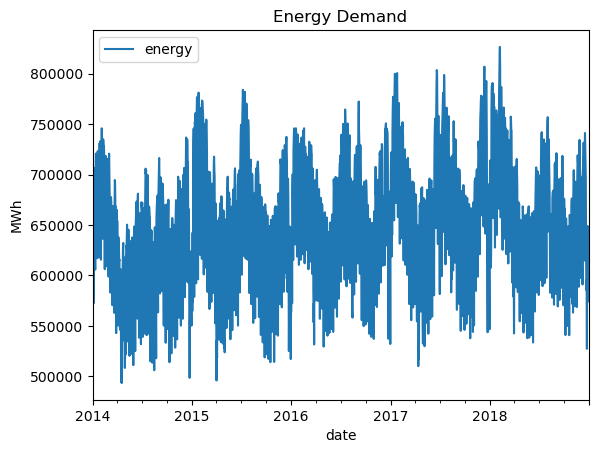

In [51]:
data.plot(title="Energy Demand",ylabel="MWh")
plt.show()

In [8]:
data.isnull().sum()

energy    0
dtype: int64

In [9]:
len(pd.date_range(start="2014-01-01",end="2018-12-31"))

1826

No null values. We can proceed further

Now we will compute somw other features to get better understanding of data

In [7]:
data["year"]=data.index.year
data["quarter"]=data.index.quarter
data["month"]=data.index.month
data["week"]=data.index.week
data["day"]=data.index.weekday
data["ix"]=range(0,len(data))
data[["movave_7","movstd_7"]]=data.energy.rolling(7).agg([np.mean,np.std])
data[["movave_30","movstd_30"]]=data.energy.rolling(30).agg([np.mean,np.std])
data[["movave_90","movstd_90"]]=data.energy.rolling(90).agg([np.mean,np.std])
data[["movave_365","movstd_365"]]=data.energy.rolling(365).agg([np.mean,np.std])

C:\Users\Samridh\AppData\Local\Temp\ipykernel_14252\1569182290.py:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  data["week"]=data.index.week


In [92]:
data

,energy,year,quarter,month,week,day,ix,movave_7,movstd_7,movave_30,movave_90,movave_365,q10,q50,q90,movstd_30,movstd_90,movstd_365
date,,,,,,,,,,,,,,,,,,
2014-01-01,620107.7,2014,1,1,1,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-02,659865.2,2014,1,1,1,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,632536.8,2014,1,1,1,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-04,610251.7,2014,1,1,1,5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-05,572534.1,2014,1,1,1,6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-26,649103.9,2018,4,12,52,2,1820,613035.557143,52872.582381,666381.870000,648904.634444,669853.374795,571785.88,653915.95,718945.11,57859.384937,53568.054612,60748.977785
2018-12-27,639571.2,2018,4,12,52,3,1821,604914.000000,40951.529855,663221.203333,649117.472222,669714.441096,571785.88,653915.95,718945.11,56592.125984,53491.590076,60760.116008
2018-12-28,602541.7,2018,4,12,52,4,1822,601834.657143,40069.578651,659591.273333,649474.835556,669552.520548,578071.92,653915.95,718945.11,56884.362306,53065.385824,60860.352499


<Figure size 3000x1600 with 0 Axes>

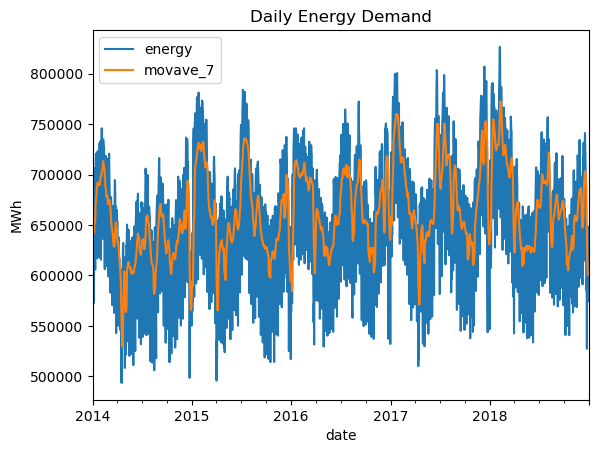

In [60]:
plt.figure(figsize=(30,16))
data[["energy","movave_7"]].plot(title="Daily Energy Demand",ylabel="MWh")
plt.show()

# EDA : Exploratory Data Analysis

The goal is to graphically characterize time series data.

### Target Analysis: Normality

In [10]:
mean=np.mean(data.energy.values)
std=np.std(data.energy.values)
skew=skew(data["energy"].values)
ex_kurt = kurtosis(data.energy)
print("Skewness: {} \nKurtosis: {}".format(skew, ex_kurt+3))

Skewness: -0.2555279252628293 
Kurtosis: 2.6052606972453667


Negative Skewness: Data distribution is not completely symmetric and has a left tail

Kurtosis below 3: It means that tails are slightly thinner than a normal distribution.

In [9]:
def shapiro_test(data,alpha=0.05):
    stat,pval=shapiro(data)
    print("H0: Data was drwan from a normal distribution")
    if(pval<alpha):
        print("pval {} is lower than significance level:{},therefore null hypothesis is rejected".format(pval,alpha))
    else:
        print("pval {} is lower than significance level:{},therefore null hypothesis cannot be rejected".format(pval,alpha))
        
shapiro_test(data.energy,alpha=0.05)

H0: Data was drwan from a normal distribution
pval 2.5459379049408426e-10 is lower than significance level:0.05,therefore null hypothesis is rejected


C:\Users\Samridh\AppData\Local\Temp\ipykernel_15696\3812896085.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.energy)


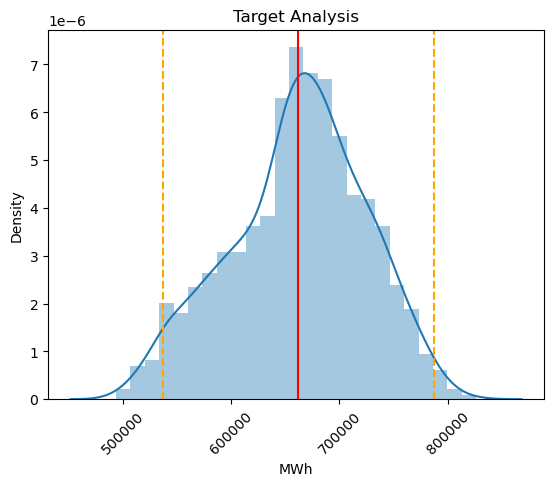

In [13]:
sns.distplot(data.energy)
plt.title("Target Analysis")
plt.xticks(rotation=45)
plt.xlabel("MWh")
plt.axvline(x=mean,color='r',linestyle='-')
plt.axvline(x=mean+2*std,color='orange',linestyle='--')
plt.axvline(x=mean-2*std,color='orange',linestyle='--')
plt.show()

Obseravtion: Doesnt really look like a normal distribution because it has small left tail

### Volatility Analysis

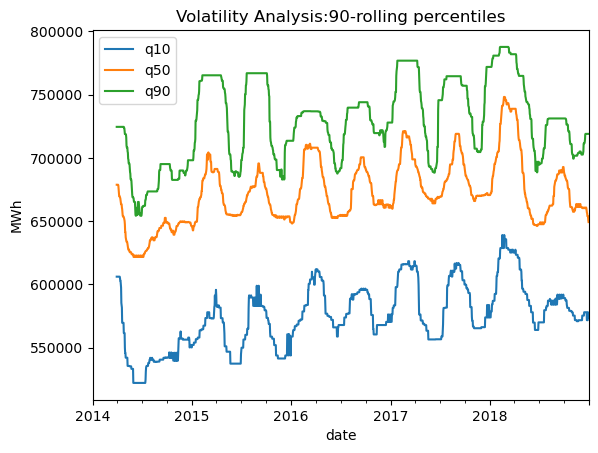

In [10]:
#Rolling quantiles are inserted in monthly returns
data_rolling=data.energy.rolling(window=90)
data['q10']=data_rolling.quantile(0.1).to_frame("q10")
data['q50']=data_rolling.quantile(0.5).to_frame("q50")
data['q90']=data_rolling.quantile(0.9).to_frame("q90")

data[["q10","q50","q90"]].plot(title="Volatility Analysis:90-rolling percentiles",ylabel="MWh")
plt.show()

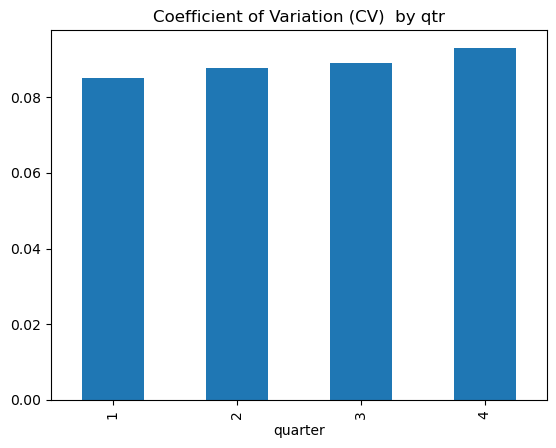

In [8]:
data.groupby("quarter")["energy"].std().divide(data.groupby("quarter")["energy"].mean()).plot(
    kind="bar",title="Coefficient of Variation (CV)  by qtr")
plt.show()

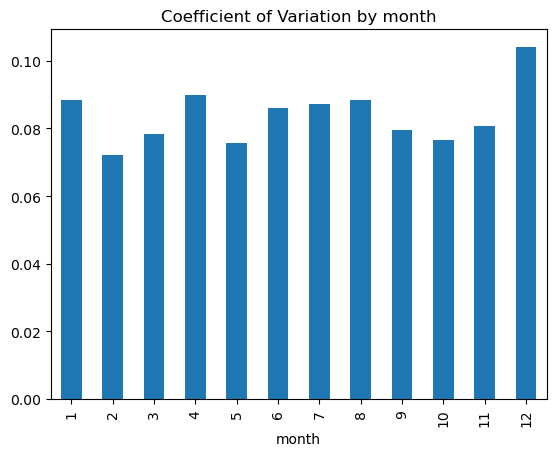

In [15]:
data.groupby("month")["energy"].std().divide(data.groupby("month")["energy"].mean()).plot(
    kind="bar",title="Coefficient of Variation by month")
plt.show()

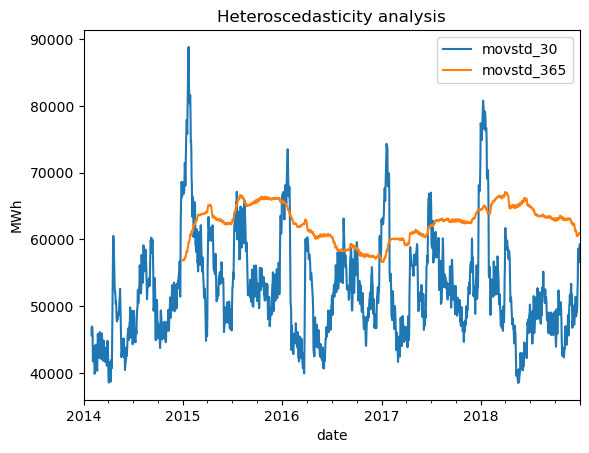

In [16]:
data[["movstd_30","movstd_365"]].plot(title="Heteroscedasticity analysis")
plt.ylabel("MWh")
plt.show()

Observations: It can be clearly seen that in 1 month duration energy demand is highly changing but in case of dusration of 1 year its not that much volatile. So we need to deal with seasonal/monthly pattern in variance.

### Time Series Analysis:Seasonality and trend

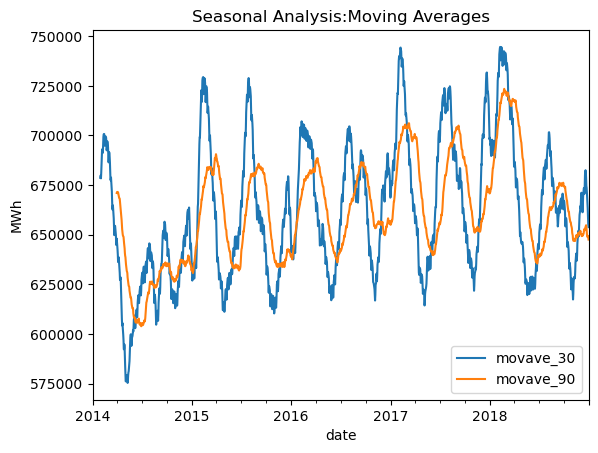

In [17]:
data[["movave_30","movave_90"]].plot(title="Seasonal Analysis:Moving Averages",ylabel="MWh")
plt.show()

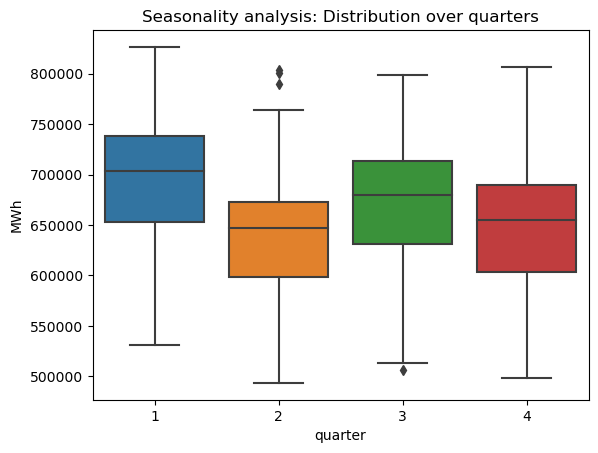

In [96]:
sns.boxplot(data=data,x="quarter",y="energy")
plt.title("Seasonality analysis: Distribution over quarters")
plt.ylabel("MWh")
plt.show()

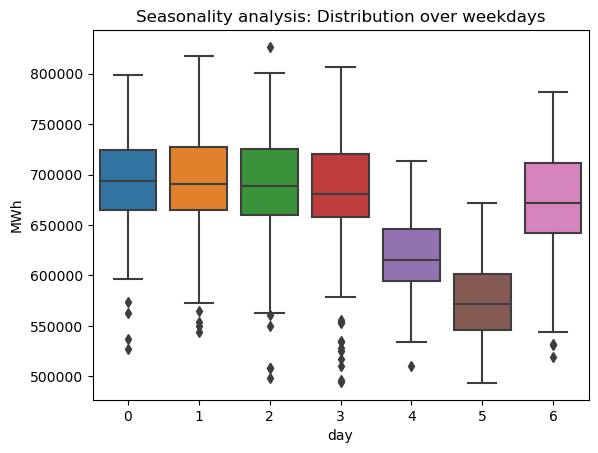

In [18]:
sns.boxplot(data=data,x="day",y="energy")
plt.title("Seasonality analysis: Distribution over weekdays")
plt.ylabel("MWh")
plt.show()

Obsevations: There are seasonal patterns in quarters and months

In [11]:
data_mon=data.energy.resample("M").agg(sum).to_frame("energy")
data_mon["ix"]=range(0,len(data_mon))
data_mon[:5]

,energy,ix
date,,
2014-01-31,21017412.7,0
2014-02-28,19336398.7,1
2014-03-31,20040978.6,2
2014-04-30,17633177.7,3
2014-05-31,18572681.6,4


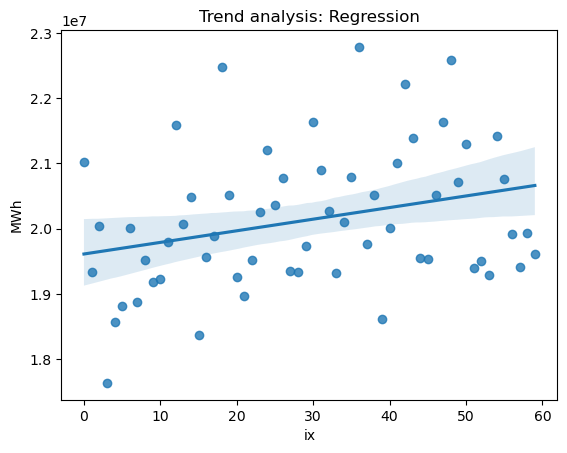

In [12]:
sns.regplot(data=data_mon,x="ix",y="energy")
plt.title("Trend analysis: Regression")
plt.ylabel("MWh")
plt.show()

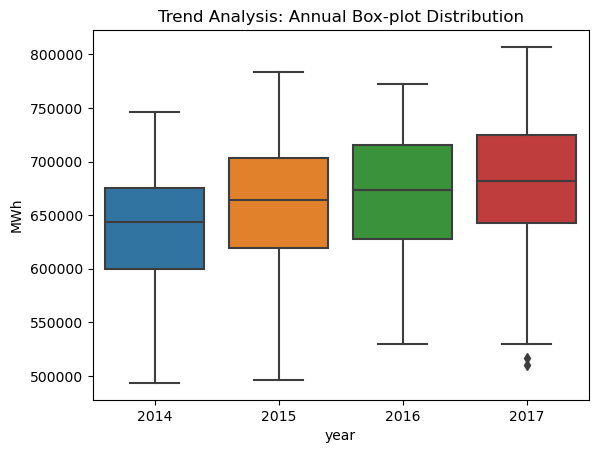

In [21]:
sns.boxplot(data=data["2014":"2017"],x="year",y="energy")
plt.title("Trend Analysis: Annual Box-plot Distribution")
plt.ylabel("MWh")
plt.show()

Observations: There is a positive linear increase trend in energy demand.

# Feature Engineering

Now our target will be to create some features in a very automated way that can deal with seasonality, trend and changes in volatility.
Data in standardised in order to allow application of models that are sensitive to scale, like nueral netowrks or svm.

Note- Distribution remains same

C:\Users\Samridh\AppData\Local\Temp\ipykernel_14252\123683454.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["target"])


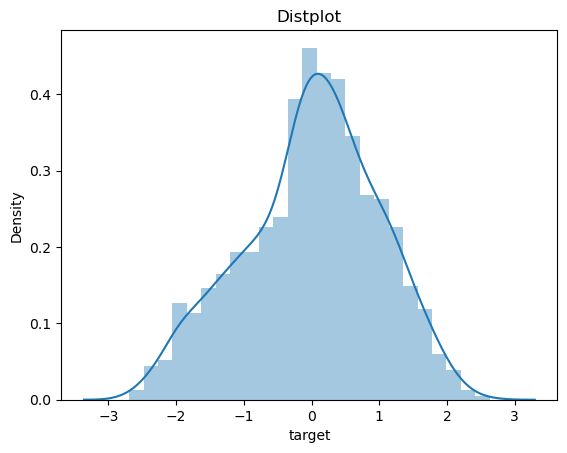

In [12]:
data["target"]=data.energy.add(-mean).div(std)
sns.distplot(data["target"])
plt.title("Distplot")
plt.show()

In [14]:
features = []
corr_features=[]
targets = []
tau = 30 #forecasting periods

for t in range(1, tau+1):
    data["target_t" + str(t)] = data.target.shift(-t)
    targets.append("target_t" + str(t))
    
for t in range(1,31):
    data["feat_ar" + str(t)] = data.target.shift(t)
    #data["feat_ar" + str(t) + "_lag1y"] = data.target.shift(350)
    features.append("feat_ar" + str(t))
    #corr_features.append("feat_ar" + str(t))
    #features.append("feat_ar" + str(t) + "_lag1y")
        
    
for t in [7, 14, 30]:
    data[["feat_movave" + str(t), "feat_movstd" + str(t), "feat_movmin" + str(t) ,"feat_movmax" + str(t)]] = 
    data.energy.rolling(t).agg([np.mean, np.std, np.max, np.min])
    features.append("feat_movave" + str(t))
    #corr_features.append("feat_movave" + str(t))
    features.append("feat_movstd" + str(t))
    features.append("feat_movmin" + str(t))
    features.append("feat_movmax" + str(t))
    
months = pd.get_dummies(data.month,
                              prefix="mon",
                              drop_first=True)
months.index = data.index
data = pd.concat([data, months], axis=1)

days = pd.get_dummies(data.day,
                              prefix="day",
                              drop_first=True)
days.index = data.index
data = pd.concat([data, days], axis=1)


features = features + months.columns.values.tolist() + days.columns.values.tolist()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2014-01-01 to 2018-12-30
Freq: D
Columns: 108 entries, energy to day_6
dtypes: float64(85), int64(6), uint8(17)
memory usage: 1.3 MB


In [15]:
corr_features=["feat_ar1","feat_ar2","feat_ar3","feat_ar4","feat_ar5","feat_ar5","feat_ar6","feat_ar7","feat_movave7","feat_movave14","feat_movave30"]

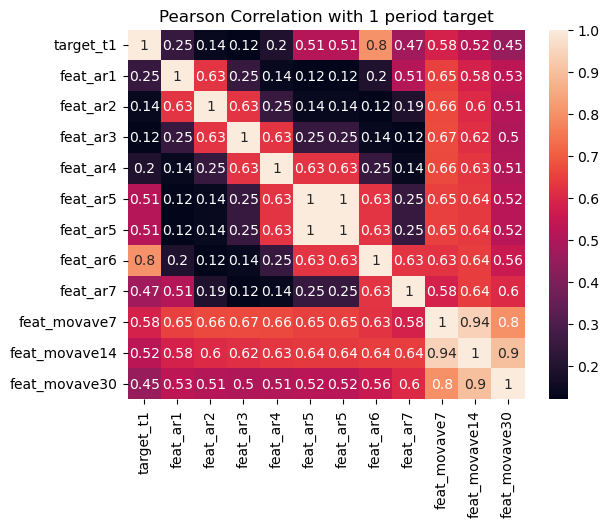

In [25]:
corr=data[["target_t1"]+corr_features].corr()
top5_mostCorrFeats=corr["target_t1"].apply(abs).sort_values(ascending=False).index.values[:6]

sns.heatmap(corr,annot=True)
plt.title("Pearson Correlation with 1 period target")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [33]:
# sns.pairplot(data=data[top5_mostCorrFeats].dropna(),kind="reg")
# plt.title("Most important features Matrix scatter plot")
# plt.show()

# Model  Building

In this step, 2 candidate models are build.

1)Linear Regression

2)Random Forest

In [16]:
data_feateng=data[features+targets].dropna()
nobs=len(data_feateng)
print("Number of Features",nobs)
data_feateng

Number of Features 1765


,feat_ar1,feat_ar2,feat_ar3,feat_ar4,feat_ar5,feat_ar6,feat_ar7,feat_ar8,feat_ar9,feat_ar10,...,target_t21,target_t22,target_t23,target_t24,target_t25,target_t26,target_t27,target_t28,target_t29,target_t30
date,,,,,,,,,,,,,,,,,,,,,
2014-01-31,0.979642,1.132876,0.887330,1.104397,0.690697,-0.705981,-0.205385,0.540337,0.857405,0.947337,...,-0.845292,-0.762378,0.406147,0.857713,0.586033,0.328933,0.422518,-0.609630,-1.008738,0.736700
2014-02-01,-0.047555,0.979642,1.132876,0.887330,1.104397,0.690697,-0.705981,-0.205385,0.540337,0.857405,...,-0.762378,0.406147,0.857713,0.586033,0.328933,0.422518,-0.609630,-1.008738,0.736700,0.938304
2014-02-02,-0.740297,-0.047555,0.979642,1.132876,0.887330,1.104397,0.690697,-0.705981,-0.205385,0.540337,...,0.406147,0.857713,0.586033,0.328933,0.422518,-0.609630,-1.008738,0.736700,0.938304,0.584516
2014-02-03,0.839971,-0.740297,-0.047555,0.979642,1.132876,0.887330,1.104397,0.690697,-0.705981,-0.205385,...,0.857713,0.586033,0.328933,0.422518,-0.609630,-1.008738,0.736700,0.938304,0.584516,0.314515
2014-02-04,1.212903,0.839971,-0.740297,-0.047555,0.979642,1.132876,0.887330,1.104397,0.690697,-0.705981,...,0.586033,0.328933,0.422518,-0.609630,-1.008738,0.736700,0.938304,0.584516,0.314515,-0.006666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-26,0.565291,-1.168957,-0.585743,0.782030,0.803931,0.911419,0.667327,0.206997,-1.489413,-0.803904,...,1.265140,1.046028,0.908655,0.549355,-0.605303,-1.220768,-1.052343,-2.150946,-0.787216,-0.206073
2018-11-27,0.947397,0.565291,-1.168957,-0.585743,0.782030,0.803931,0.911419,0.667327,0.206997,-1.489413,...,1.046028,0.908655,0.549355,-0.605303,-1.220768,-1.052343,-2.150946,-0.787216,-0.206073,-0.358261
2018-11-28,1.155526,0.947397,0.565291,-1.168957,-0.585743,0.782030,0.803931,0.911419,0.667327,0.206997,...,0.908655,0.549355,-0.605303,-1.220768,-1.052343,-2.150946,-0.787216,-0.206073,-0.358261,-0.949432


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_feateng[features],data_feateng[targets], test_size=0.2,shuffle=False)

In [57]:
X_train

,feat_ar1,feat_ar2,feat_ar3,feat_ar4,feat_ar5,feat_ar6,feat_ar7,feat_ar8,feat_ar9,feat_ar10,...,mon_9,mon_10,mon_11,mon_12,day_1,day_2,day_3,day_4,day_5,day_6
date,,,,,,,,,,,,,,,,,,,,,
2014-01-31,0.979642,1.132876,0.887330,1.104397,0.690697,-0.705981,-0.205385,0.540337,0.857405,0.947337,...,0,0,0,0,0,0,0,1,0,0
2014-02-01,-0.047555,0.979642,1.132876,0.887330,1.104397,0.690697,-0.705981,-0.205385,0.540337,0.857405,...,0,0,0,0,0,0,0,0,1,0
2014-02-02,-0.740297,-0.047555,0.979642,1.132876,0.887330,1.104397,0.690697,-0.705981,-0.205385,0.540337,...,0,0,0,0,0,0,0,0,0,1
2014-02-03,0.839971,-0.740297,-0.047555,0.979642,1.132876,0.887330,1.104397,0.690697,-0.705981,-0.205385,...,0,0,0,0,0,0,0,0,0,0
2014-02-04,1.212903,0.839971,-0.740297,-0.047555,0.979642,1.132876,0.887330,1.104397,0.690697,-0.705981,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-08,0.200641,1.274899,0.350957,1.841169,1.540355,-0.038282,0.545562,1.855233,1.765903,1.603730,...,0,0,0,1,0,0,0,1,0,0
2017-12-09,0.670176,0.200641,1.274899,0.350957,1.841169,1.540355,-0.038282,0.545562,1.855233,1.765903,...,0,0,0,1,0,0,0,0,1,0
2017-12-10,-0.215962,0.670176,0.200641,1.274899,0.350957,1.841169,1.540355,-0.038282,0.545562,1.855233,...,0,0,0,1,0,0,0,0,0,1


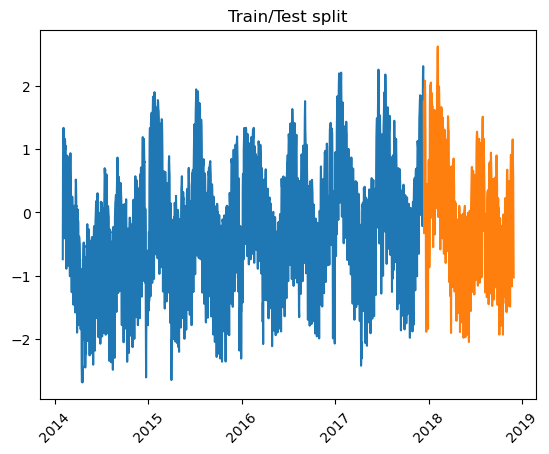

In [18]:
plt.plot(y_train.index, y_train.target_t1.values, label="train")
plt.plot(y_test.index, y_test.target_t1.values, label="test")
plt.title("Train/Test split")
plt.xticks(rotation=45)
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg =LinearRegression().fit(X_train,y_train["target_t1"])
p_train=reg.predict(X_train)
p_test=reg.predict(X_test)

RMSE_train = np.sqrt(mean_squared_error(y_train["target_t1"], p_train))
RMSE_test = np.sqrt(mean_squared_error(y_test["target_t1"], p_test))

print("Train RMSE: {}\nTest RMSE: {}".format(RMSE_train, RMSE_test) )

Train RMSE: 0.3233066786281527
Test RMSE: 0.32586208635407454


Train a Random Forest with Time series split to tune hyperparameters

TRAIN: 353 TEST: 353


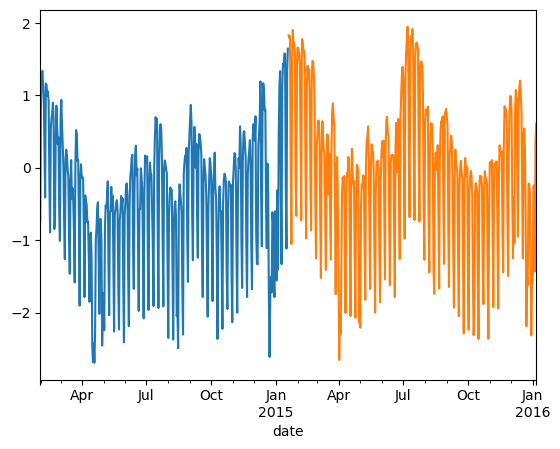

TRAIN: 706 TEST: 353


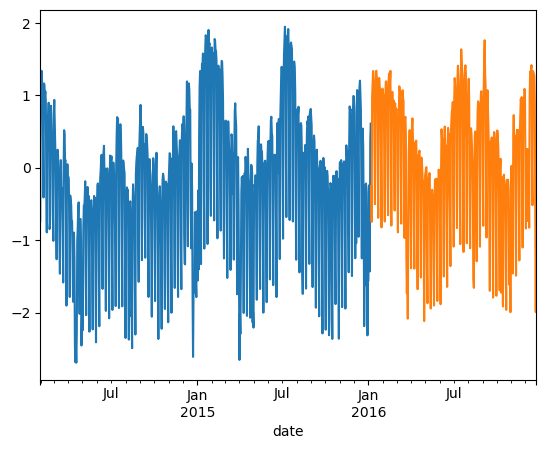

TRAIN: 730 TEST: 353


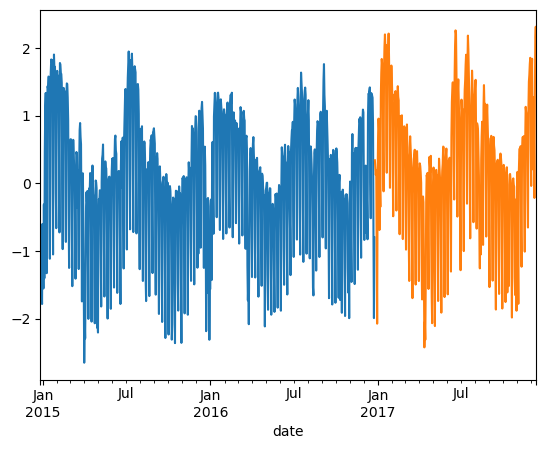

In [20]:
from sklearn.model_selection import TimeSeriesSplit, ParameterGrid

splits=TimeSeriesSplit(n_splits=3, max_train_size=365*2)
for train_index, val_index in splits.split(X_train):
    print("TRAIN:", len(train_index), "TEST:", len(val_index))
    y_train["target_t1"][train_index].plot()
    y_train["target_t1"][val_index].plot()
    plt.show()

In [24]:
from sklearn.ensemble import RandomForestRegressor

splits= TimeSeriesSplit(n_splits=3,max_train_size=365*2)
rfr= RandomForestRegressor()

#Create a dictionary of hyperparameters to search
rfr_grid ={"n_estimators":[500],
          'max_depth':[3,5,10,20,30],
          'max_features':[4,8,16,32,59],
          'random_state':[123]}

rfr_paramGrid= ParameterGrid(rfr_grid)

def TimeSplit_ModBuild(model, paramGrid, splits, X, y):
    from sklearn.model_selection import TimeSeriesSplit
    from sklearn.metrics import mean_squared_error

    #Loop over each time split and for each
    for train_index, val_index in splits.split(X_train):
        _X_train_ = X.iloc[train_index]
        _y_train_ = y.iloc[train_index]
        _X_val_ = X.iloc[val_index]
        _y_val_ = y.iloc[val_index]

        train_scores = []
        val_scores = []
        #models = []
        
        # Loop through the parameter grid, set the hyperparameters, and save the scores
        for g in paramGrid:
            model.set_params(**g)
            model.fit(_X_train_, _y_train_)
            p_train = model.predict(_X_train_)
            p_val = model.predict(_X_val_)
            score_train = np.mean(mean_squared_error(_y_train_, p_train))
            score_val = np.mean(mean_squared_error(_y_val_, p_val))
            train_scores.append(score_train)
            val_scores.append(score_val)
            #models.append(model)
            best_idx = np.argmin(val_scores)
            
        print("Best-Fold HyperParams:: ", paramGrid[best_idx])
        print("Best-Fold Train RMSE: ", train_scores[best_idx])
        print("Best-Fold Val RMSE: ",val_scores[best_idx])
        print("\n")
        
    #Return most recent model
    return train_scores, val_scores, best_idx


CV_rfr_tup = TimeSplit_ModBuild(rfr, rfr_paramGrid, splits, X_train, y_train["target_t1"])
        

Best-Fold HyperParams::  {'random_state': 123, 'n_estimators': 500, 'max_features': 32, 'max_depth': 20}
Best-Fold Train RMSE:  0.027622667427408813
Best-Fold Val RMSE:  0.26331013733758313


Best-Fold HyperParams::  {'random_state': 123, 'n_estimators': 500, 'max_features': 16, 'max_depth': 20}
Best-Fold Train RMSE:  0.022485800743324104
Best-Fold Val RMSE:  0.17984099618045754


Best-Fold HyperParams::  {'random_state': 123, 'n_estimators': 500, 'max_features': 16, 'max_depth': 20}
Best-Fold Train RMSE:  0.021384836065347263
Best-Fold Val RMSE:  0.18567982045380432




In [25]:
best_rfr_idx = CV_rfr_tup[2]
best_rfr_grid = rfr_paramGrid[best_rfr_idx]
best_rfr = RandomForestRegressor().set_params(**best_rfr_grid).\
    fit(X_train.loc["2016":"2017"], y_train.loc["2016":"2017", "target_t1"])

Random forest provides an improvement compared to linear regression

## Feature Importance

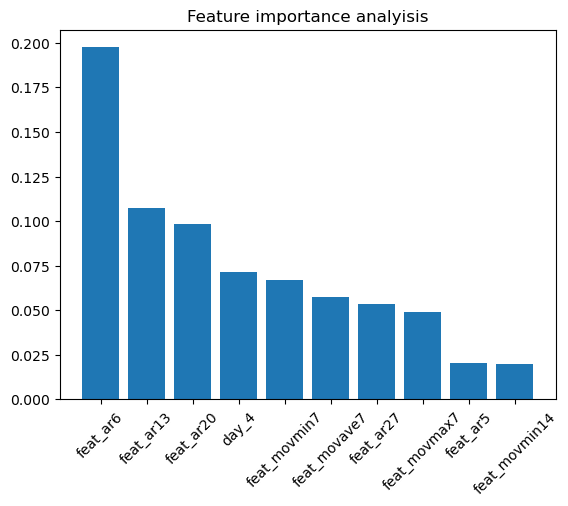

In [26]:
# Get feature importances from our random forest model
importances = best_rfr.feature_importances_

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
sorted_index_top = sorted_index[:10]
x = range(len(sorted_index_top))

# Create tick labels 
labels = np.array(features)[sorted_index_top]
plt.bar(x, importances[sorted_index_top], tick_label=labels)
plt.title("Feature importance analyisis")
# Rotate tick labels to vertical
plt.xticks(rotation=45)
plt.show()

Observations: Results are not same as the one yielded by correlation analysis.
Conclusion: Complex relationships and interactions may impact model performance